In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the lenna.jpg image
image = cv2.imread('board.png', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


In [50]:
import numpy as np
import cv2  # OpenCV for image handling

def add_white_noise(image, snr_db):

#      # Ensure image is in float format for precise calculations
#     image = image.astype(np.float64)
    # Calculate the power of the original signal (image)
    signal_power = np.mean(image**2)
    
    # Calculate the power of the noise based on the desired SNR (in dB)
    snr_linear = 10**(snr_db / 10)
    # Calculate the noise power based on the desired SNR (in dB)
    noise_power = signal_power / (10**(snr_db / 10))

    
    # Generate noise with the calculated power and zero mean
    noise = np.random.normal(0, np.sqrt(noise_power), image.shape)
    
    # Add the generated noise to the original image
    noisy_image = image + noise
    
    # Clip the values to be in the valid range (0, 255) for image data
    noisy_image = np.clip(noisy_image, 0, 255)

    #  # Convert the image back to unsigned 8-bit format
    # noisy_image = noisy_image.astype(np.uint8)
    
    return noisy_image






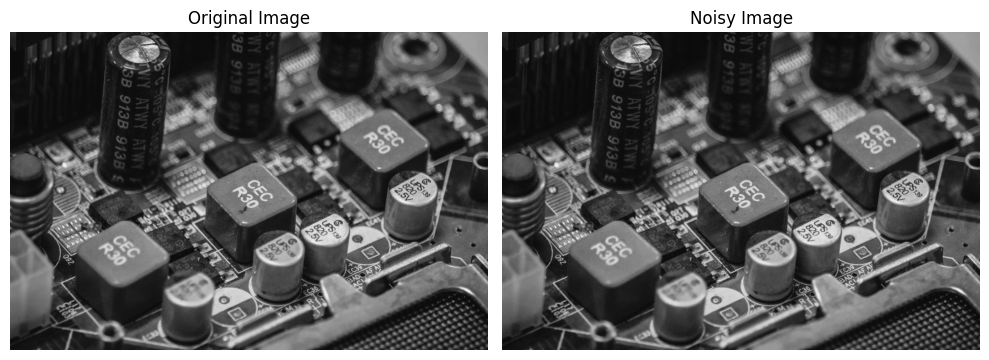

In [51]:
# Add white noise with SNR of 15 dB
noisy_image = add_white_noise(image, 15)


# Save the images
cv2.imwrite('original_image.png', image)  # Save the original image
cv2.imwrite('noisy_image.png', noisy_image)  # Save the noisy image

# Use matplotlib to display the images side by side
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
# Calculate the signal power of the original image
signal_power_original = np.mean(image**2)

# Calculate the noise power of the noisy image
noise_power_noisy = np.mean((noisy_image - image)**2)

# Calculate the SNR in dB
snr_noisy = 10 * np.log10(signal_power_original / noise_power_noisy)

print("SNR of the noisy image:", snr_noisy)

SNR of the noisy image: 15.003827069416324


In [41]:
import numpy as np

def add_impulse_noise(image, density):
    # Ensure image is in float format for precise calculations
    image = image.astype(np.float64)
    
    # Generating impulse noise
    noise_mask = np.random.default_rng().uniform(0, 1, size=image.shape) < density
    
    # Add the noise to the image
    noisy_image = np.where(noise_mask, 255, image)
    
    return noisy_image.astype(np.uint8)

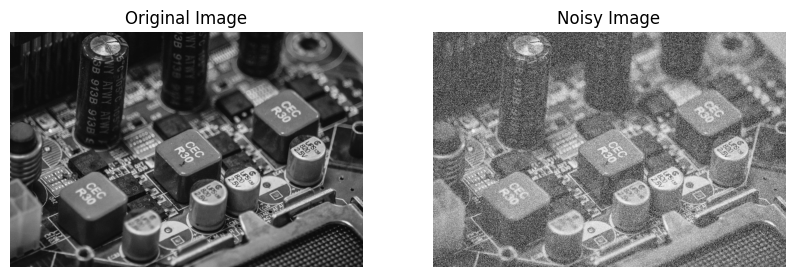

In [42]:
# Add impulse noise with 30% density
noisy_image = add_impulse_noise(image, density=0.3)

# Display the original and noisy images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.show()

In [43]:
# Calculate the total number of pixels in the image
total_pixels = image.shape[0] * image.shape[1]

# Count the number of pixels affected by noise
noisy_pixels = np.sum(noisy_image != image)

# Calculate the percentage of noisy pixels
noisy_percentage = (noisy_pixels / total_pixels) * 100

print("Density of impulse noise:", noisy_percentage, "%")

Density of impulse noise: 30.00213333333333 %


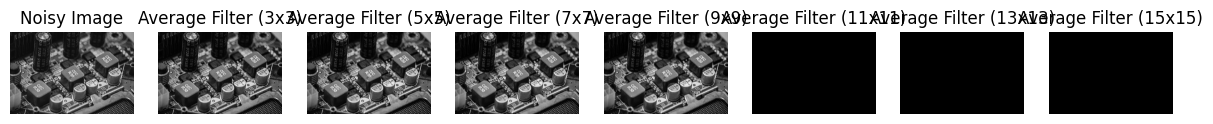

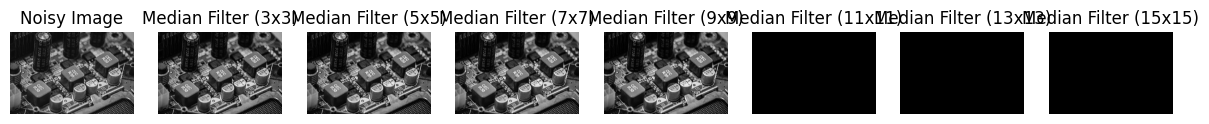

In [48]:
# Define the range of filter sizes
dim_low = 3
dim_high = 9
size_dim = dim_high - dim_low + 1

# Initialize arrays to store filtered images
avg_filtered_images_awgn = np.zeros((noisy_image.shape[0], noisy_image.shape[1], size_dim), dtype=np.uint8)
median_filtered_images_awgn = np.zeros((noisy_image.shape[0], noisy_image.shape[1], size_dim), dtype=np.uint8)

# Apply filters for each filter size
for i, size in enumerate(range(dim_low, dim_high + 1, 2)):  # Using only odd filter sizes
    # Apply average filter
    avg_filtered_images_awgn[:, :, i] = cv2.blur(noisy_image, (size, size))
    
    # Apply median filter
    median_filtered_images_awgn[:, :, i] = cv2.medianBlur(noisy_image, size)

# Plot the images
plt.figure(figsize=(15, 5))

# Plot the original noisy image
plt.subplot(1, size_dim + 1, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot the filtered images for different filter sizes
for i in range(size_dim):
    plt.subplot(1, size_dim + 1, i + 2)
    plt.imshow(avg_filtered_images_awgn[:, :, i], cmap='gray')
    plt.title(f'Average Filter ({dim_low + i * 2}x{dim_low + i * 2})')
    plt.axis('off')

plt.show()

plt.figure(figsize=(15, 5))

# Plot the original noisy image
plt.subplot(1, size_dim + 1, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot the filtered images for different filter sizes
for i in range(size_dim):
    plt.subplot(1, size_dim + 1, i + 2)
    plt.imshow(median_filtered_images_awgn[:, :, i], cmap='gray')
    plt.title(f'Median Filter ({dim_low + i * 2}x{dim_low + i * 2})')
    plt.axis('off')

plt.show()